## one kind of normalized regression type - Ridge Regression - which solves problem of data overfitting.

# Motivation for Ridge Regression
Linear regression model is given by following equation:

Y = Σ WⱼHⱼ(Xᵢ)
Here, 
Σ runs from j = 0 to j = D where D is the total number of features.
Wⱼ is the jᵗʰ coefficient 
Hⱼ is the jᵗʰ feature function which takes Xᵢ observation
Xᵢ is the iᵗʰ observation
The above equation gives the predicted value, provided we know the values of W coefficients.
For simplification, let’s denote the above equation by 𝔽(X) where X is the observation.

Cost function of Linear Regression model is given by following equation:

Cost Function = RSS(W) = Σ [Yᵢ — 𝔽(Xᵢ)]²
Here,
Σ runs from i=0 to i = N where N is the total number of observations.
Yᵢ is the known value of iᵗʰ observation.
𝔽(Xᵢ) gives the predicted value of iᵗʰ observation.
RSS stands for Residual Sum of Squares
Cost function always work on the training data set.

The whole idea of linear regression model revolves around minimizing the above cost function’s value. Lower the cost function value, better the linear regression model.

Generally, to decrease the cost function, we increase the number of features in our model. As we keep on increasing the features in model, model starts fitting the training data set well and cost function value starts decreasing.

But, with increase in number of features; our equations becomes a higher order polynomial equation; and it leads to overfitting of the data.

Why overfitting of data is bad ?
In an overfitted model the training error becomes almost zero resulting into saying that model is working perfectly on training data set. But does that model works perfectly on data sets other than training data set like real outside world data?
Generally it is seen that an overfitted model performs worse on the testing data set, and it is also observed that overfitted model perform worse on additional new test data set as well.


Overfitted data & performing worse on test data set. Source
From the above graph, we can see the overfitted model performs well on training data set and cost function is zero for training data set.

But when we test this model with the test data set in graph above, model isn’t performing well at all. For test data, model is predicting wrong values which are far from actual correct values. This is sufficient to label this model as unfit for use in industry.

How to catch overfitting?
By visualising the model (like above), one can easily see the overfitting in the model(observe how model fits training data set well). But as our model’s complexity increases, it goes into higher dimension which makes it difficult to visualise on graphs(or some other tool).

Instead of trying to visualise the model always, we can also see overfitting by seeing the coefficients’ value ( W ). Generally when overfitting happens, these coefficients’ values becomes very huge.

Ridge regression is used to quantify the overfitting of the data through measuring the magnitude of coefficients.

To fix the problem of overfitting, we need to balance two things:
1. How well function/model fits data.
2. Magnitude of coefficients.

So,
Total Cost Function = Measure of fit of model + Measure of magnitude                    of coefficient
Here,
Measure of fit of model = RSS(W)
Measure of magnitude of coefficient = ||W||²
If Measure of fit of the model is a small value that means model is well fit to the data.
If Measure of magnitude of coefficient is a small value that means model is not overfit.
Total Cost Function = RSS(W) + λ*||W||²
We have added λ in total cost function as a tuning parameter to balance the fit of data and magnitude of coefficients.
Computing the Gradient Descent of Ridge Regression
Ridge Regression Cost = RSS(W) + λ*||W||² = (Y - WH)*(Y - WH) + WW

In matrix notation it will be written as:
Ridge Regression Cost = (Y - HW)ᵗ (Y - HW) + WᵗW

Taking gradient of above equation(differentiation):

Δ[RSS(W) + λ||W||]²
= Δ{(Y - HW)ᵗ(Y - HW)} + λ Δ{WᵗW}
= -2Hᵗ(Y - HW)+2λW
Setting the above gradient to 0 we get

W = (HᵗH + λI)-¹HᵗY
Thus, we know the values of W coefficients.

How to choose λ value?
The given data set into three sets:
1. Training Set
2. Validation Set
3. Test Set


Division of data into three different sets
Training Set
This data set will be used to get W coefficients’ value every value of λ. Let’s assume the value of W coefficients’ for each value of λ value be Wλ.

Validation Set
The different values of Wλ will be assessed on validation set. The one which has lower error value will get selected.

Test Set
The selected value of W coefficients’ will again be assessed by test data set.

The above method is used only if sufficient amount of data is present.

And this is how finally λ’s value is selected. The process is kind of brute force. But with smart guesses and experience, iterations to guess λ value can be reduced.

Conclusion
We have seen why overfitting is bad in machine learning and how it is identified in the model by looking at the model’s W coefficients’ values. Then we saw new cost function for linear regression which takes into account overfitting of data with the tuning parameter λ.

Then we saw formula for calculating W values with respect to new cost function and how to choose value for λ.

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Data Description :-

Data :- Independent Variables also known as the x values.
feature_names :- The column names of the data.
target :- The target variable or the price of the houses(dependent variable) alse known as y value.

In [4]:
# creating dataframe 

data = pd.DataFrame(df.data, columns = df.feature_names)

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
# adding target value to the data

data['MEDV'] = df.target

In [7]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

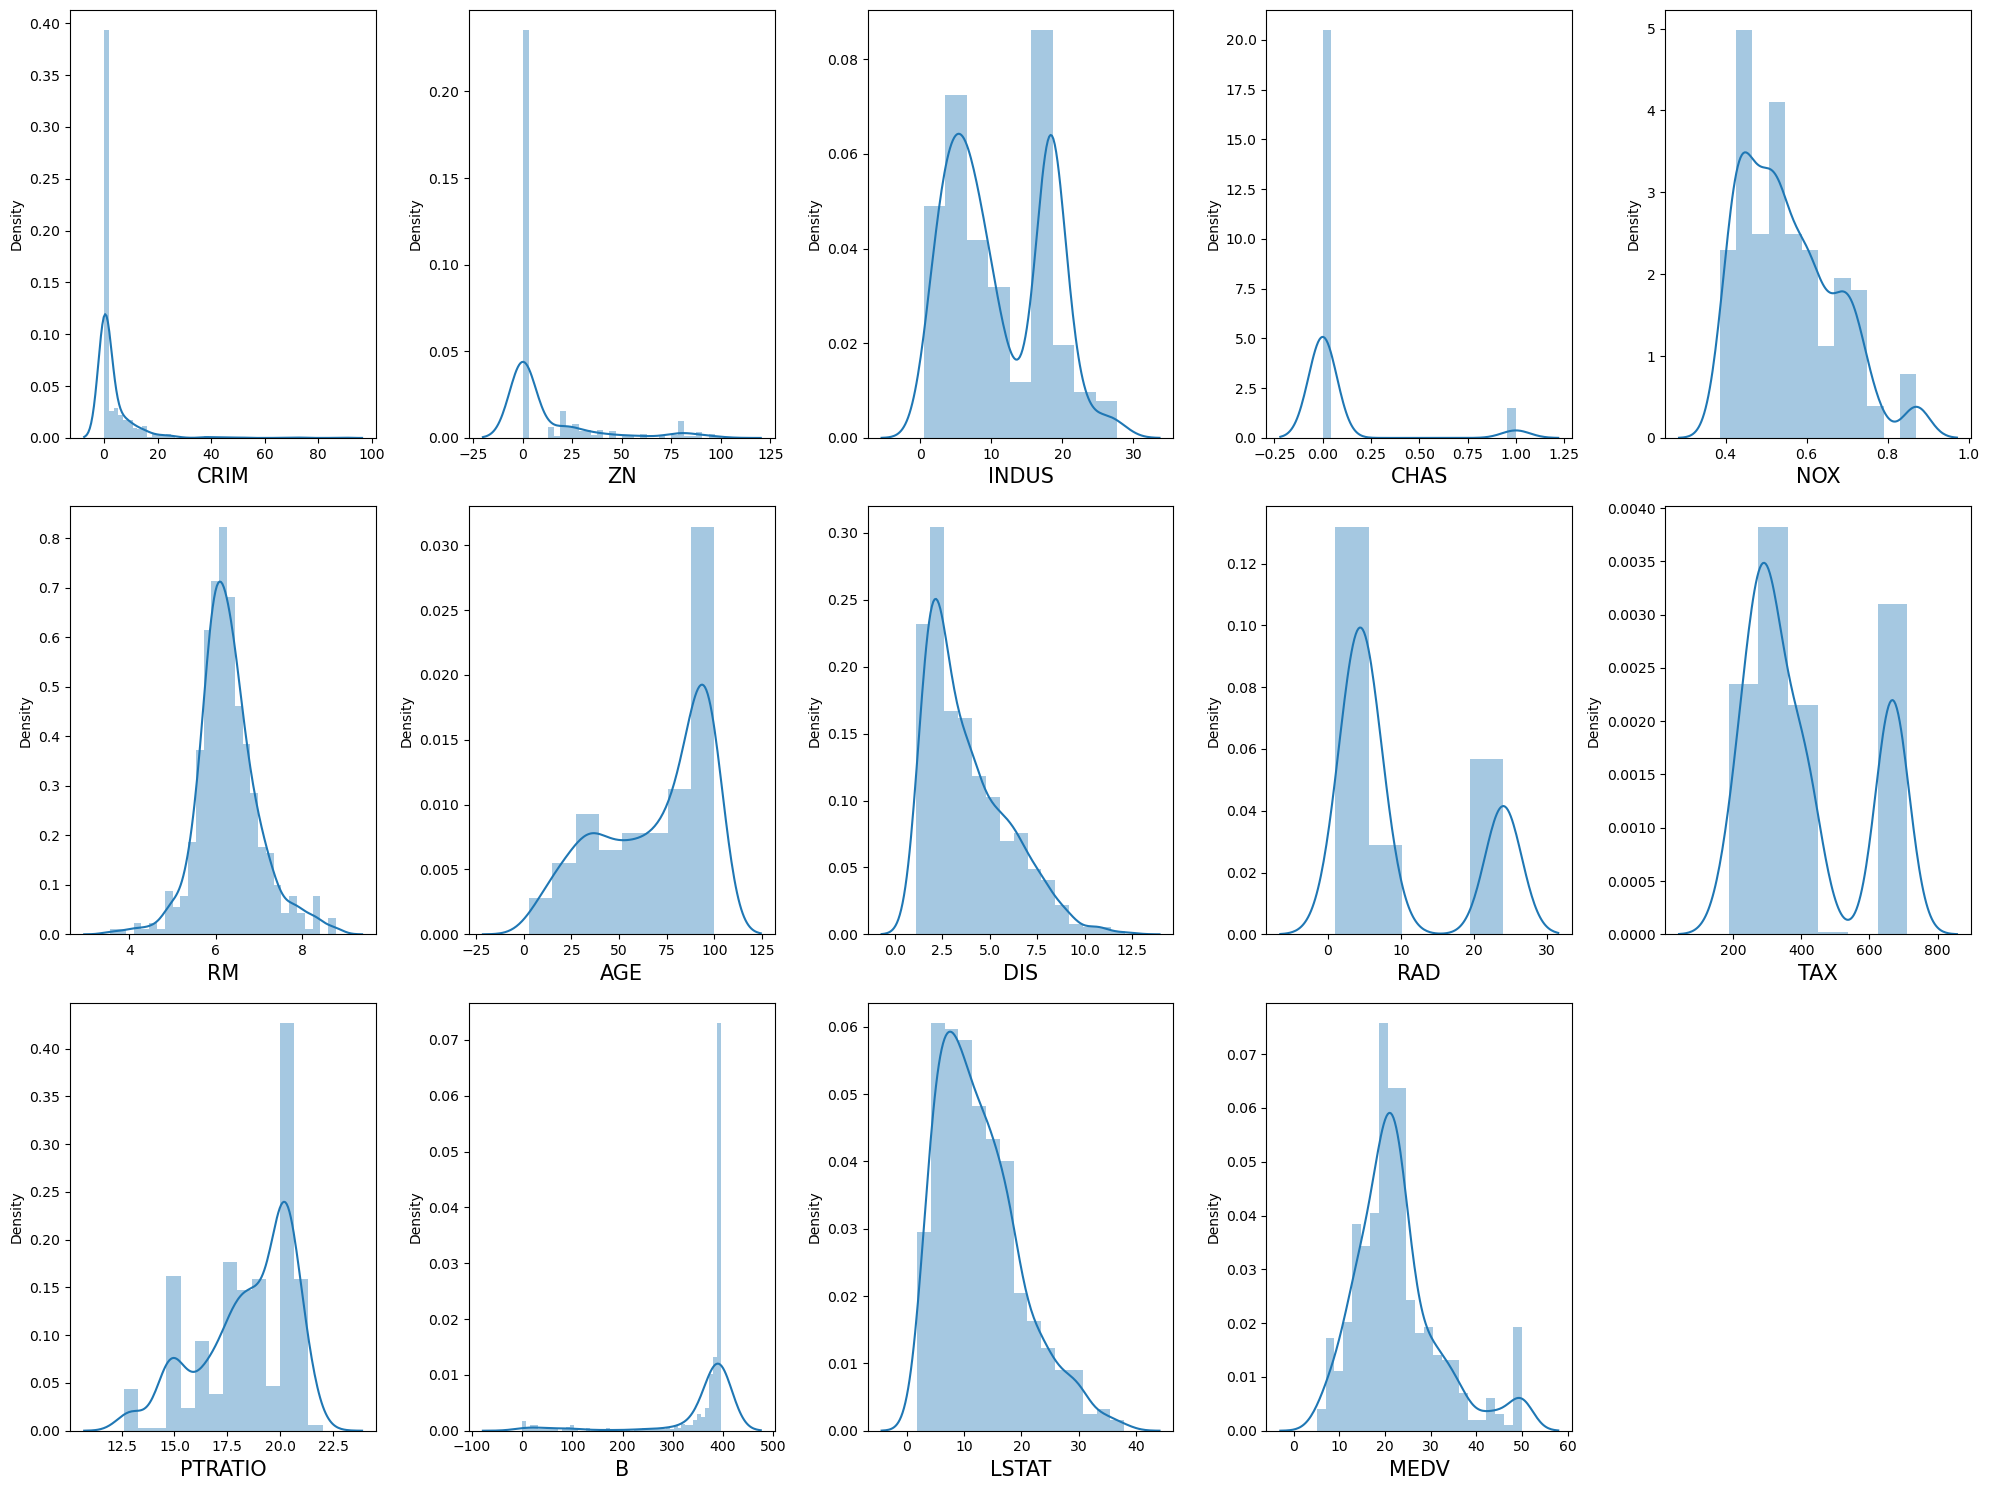

In [11]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

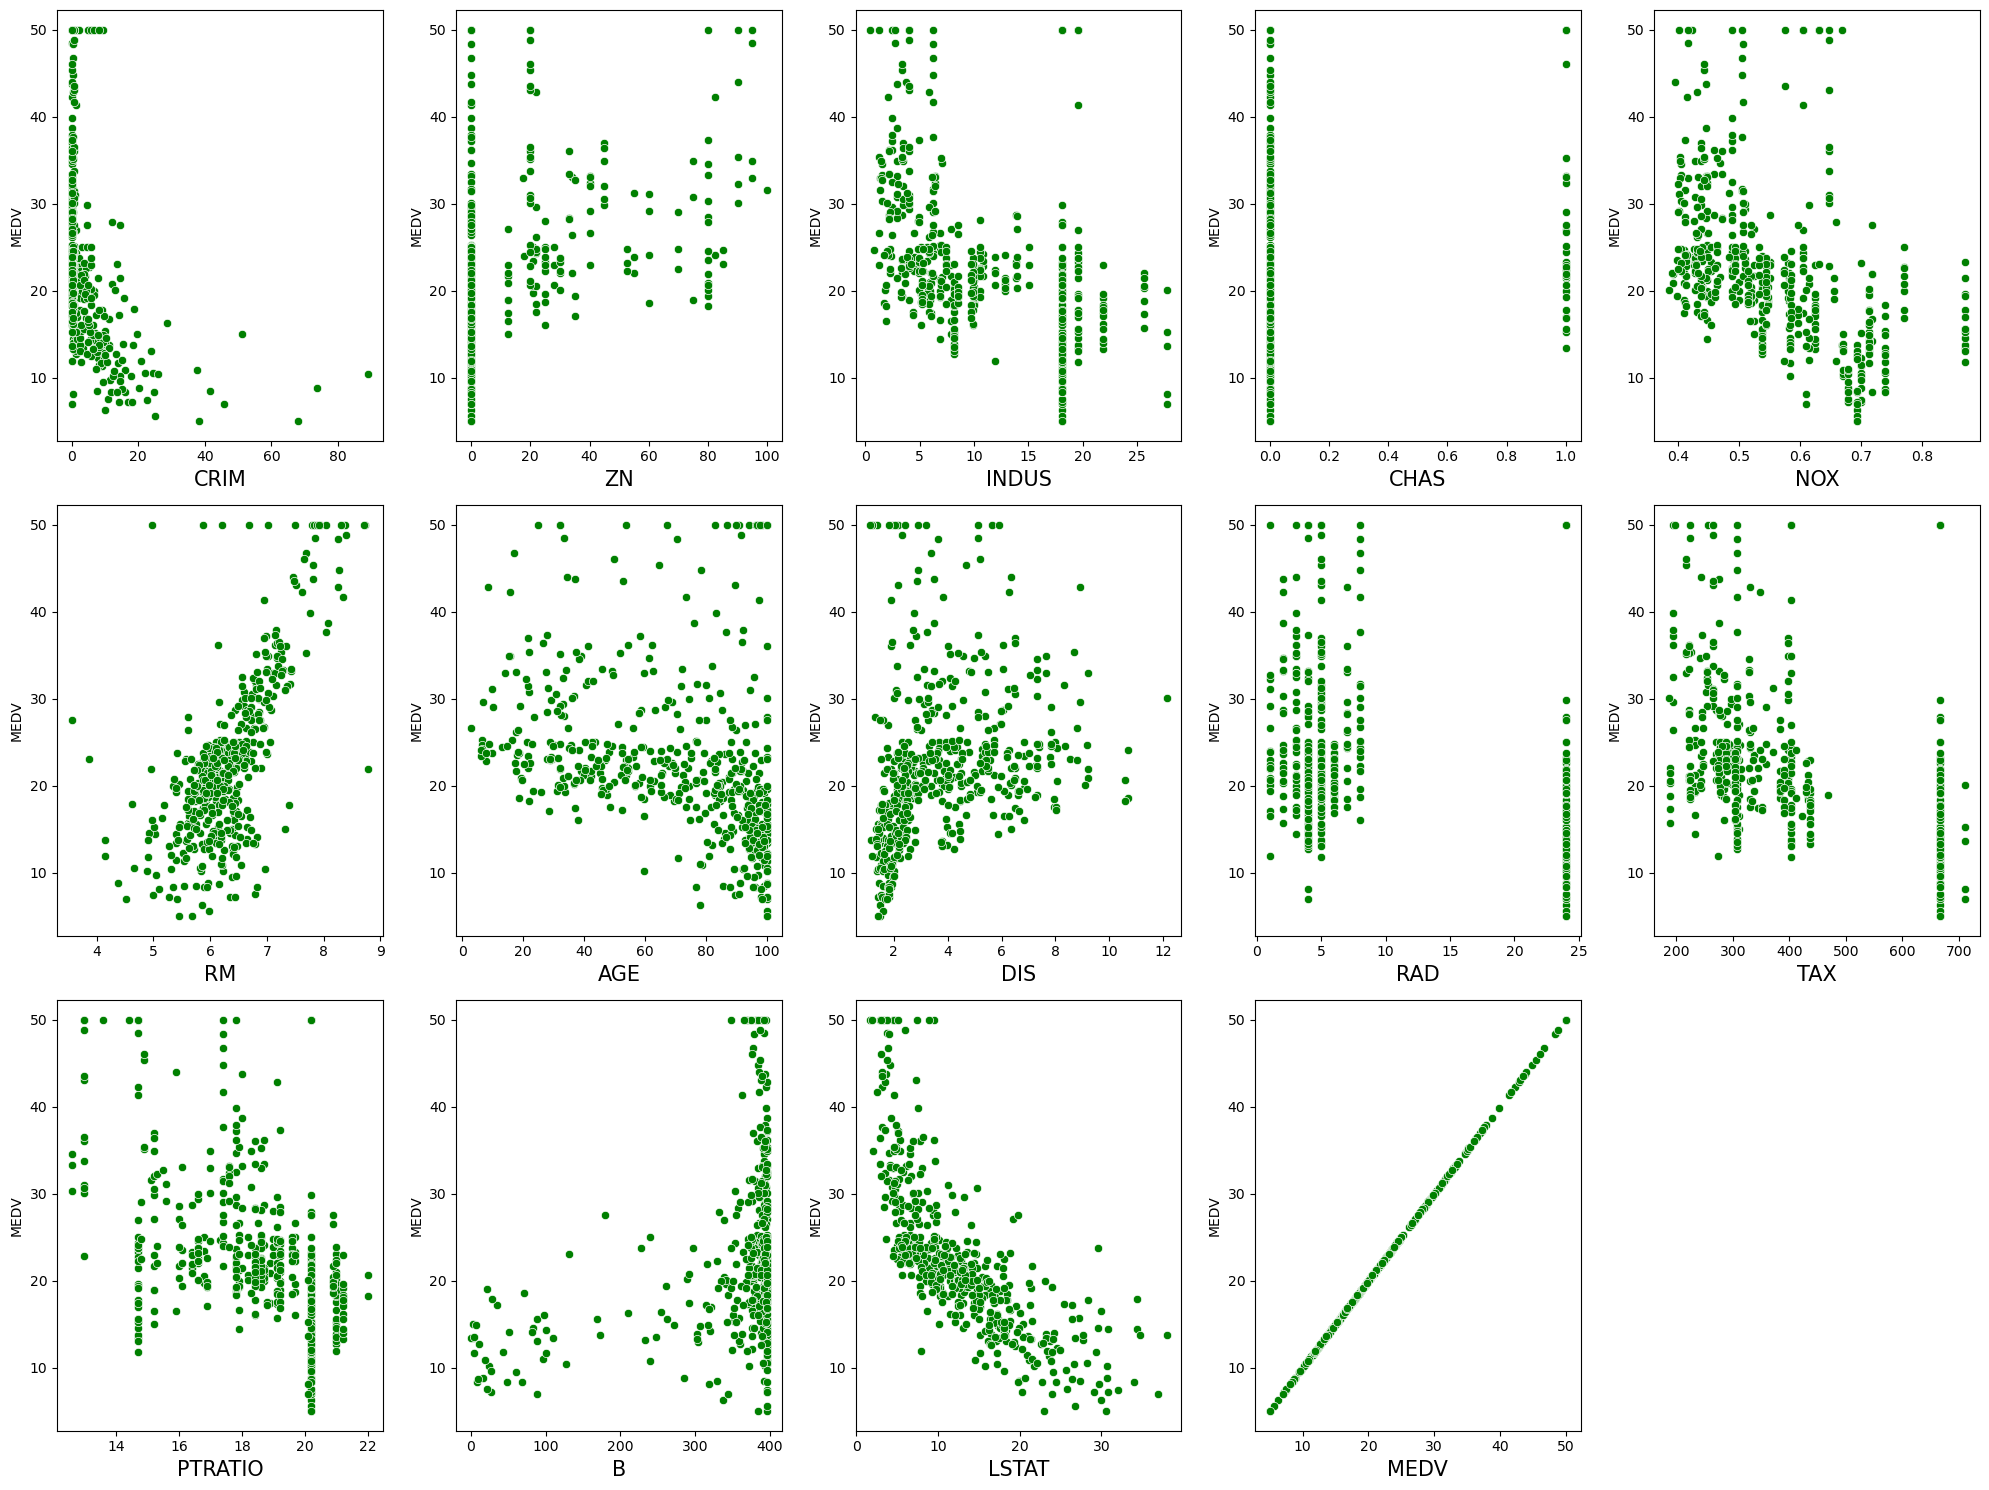

In [12]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x=data[column],y=data['MEDV'],color='g')
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Checking outlierss 

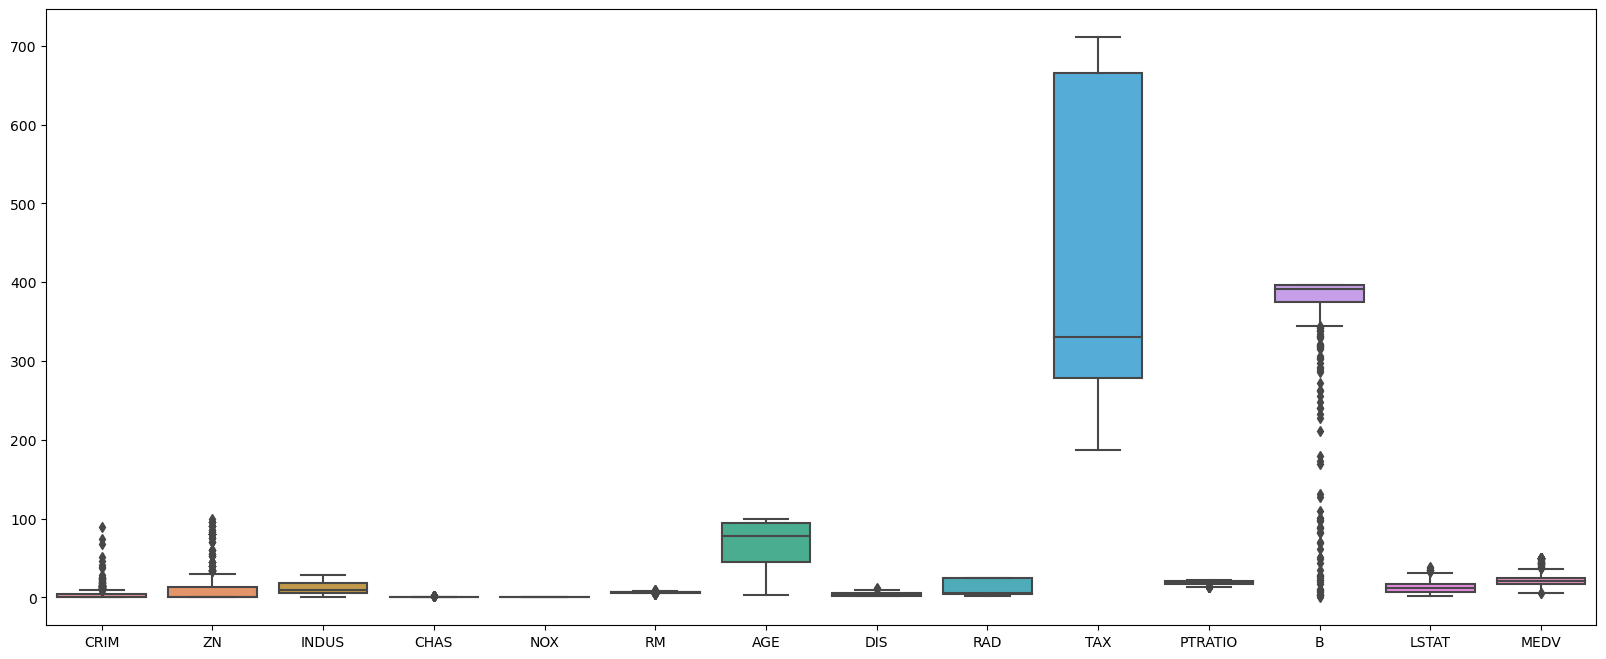

In [13]:
# looking for outliers using box plot

plt.figure(figsize = (20, 8))
sns.boxplot(data = data, width = 0.8)
plt.show()

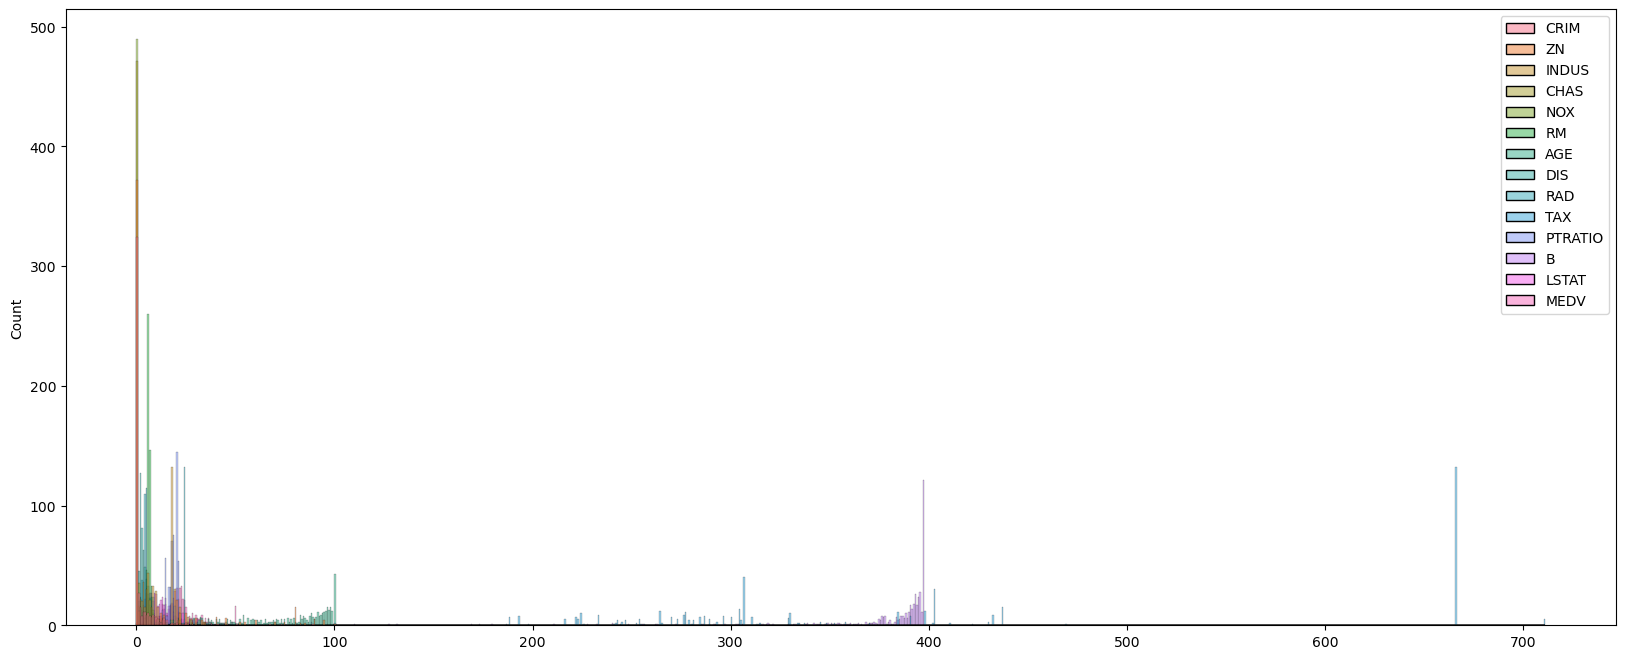

In [14]:
# looking for outliers using box plot

plt.figure(figsize = (20, 8))
sns.histplot(data = data, binwidth = 0.8)
plt.show()

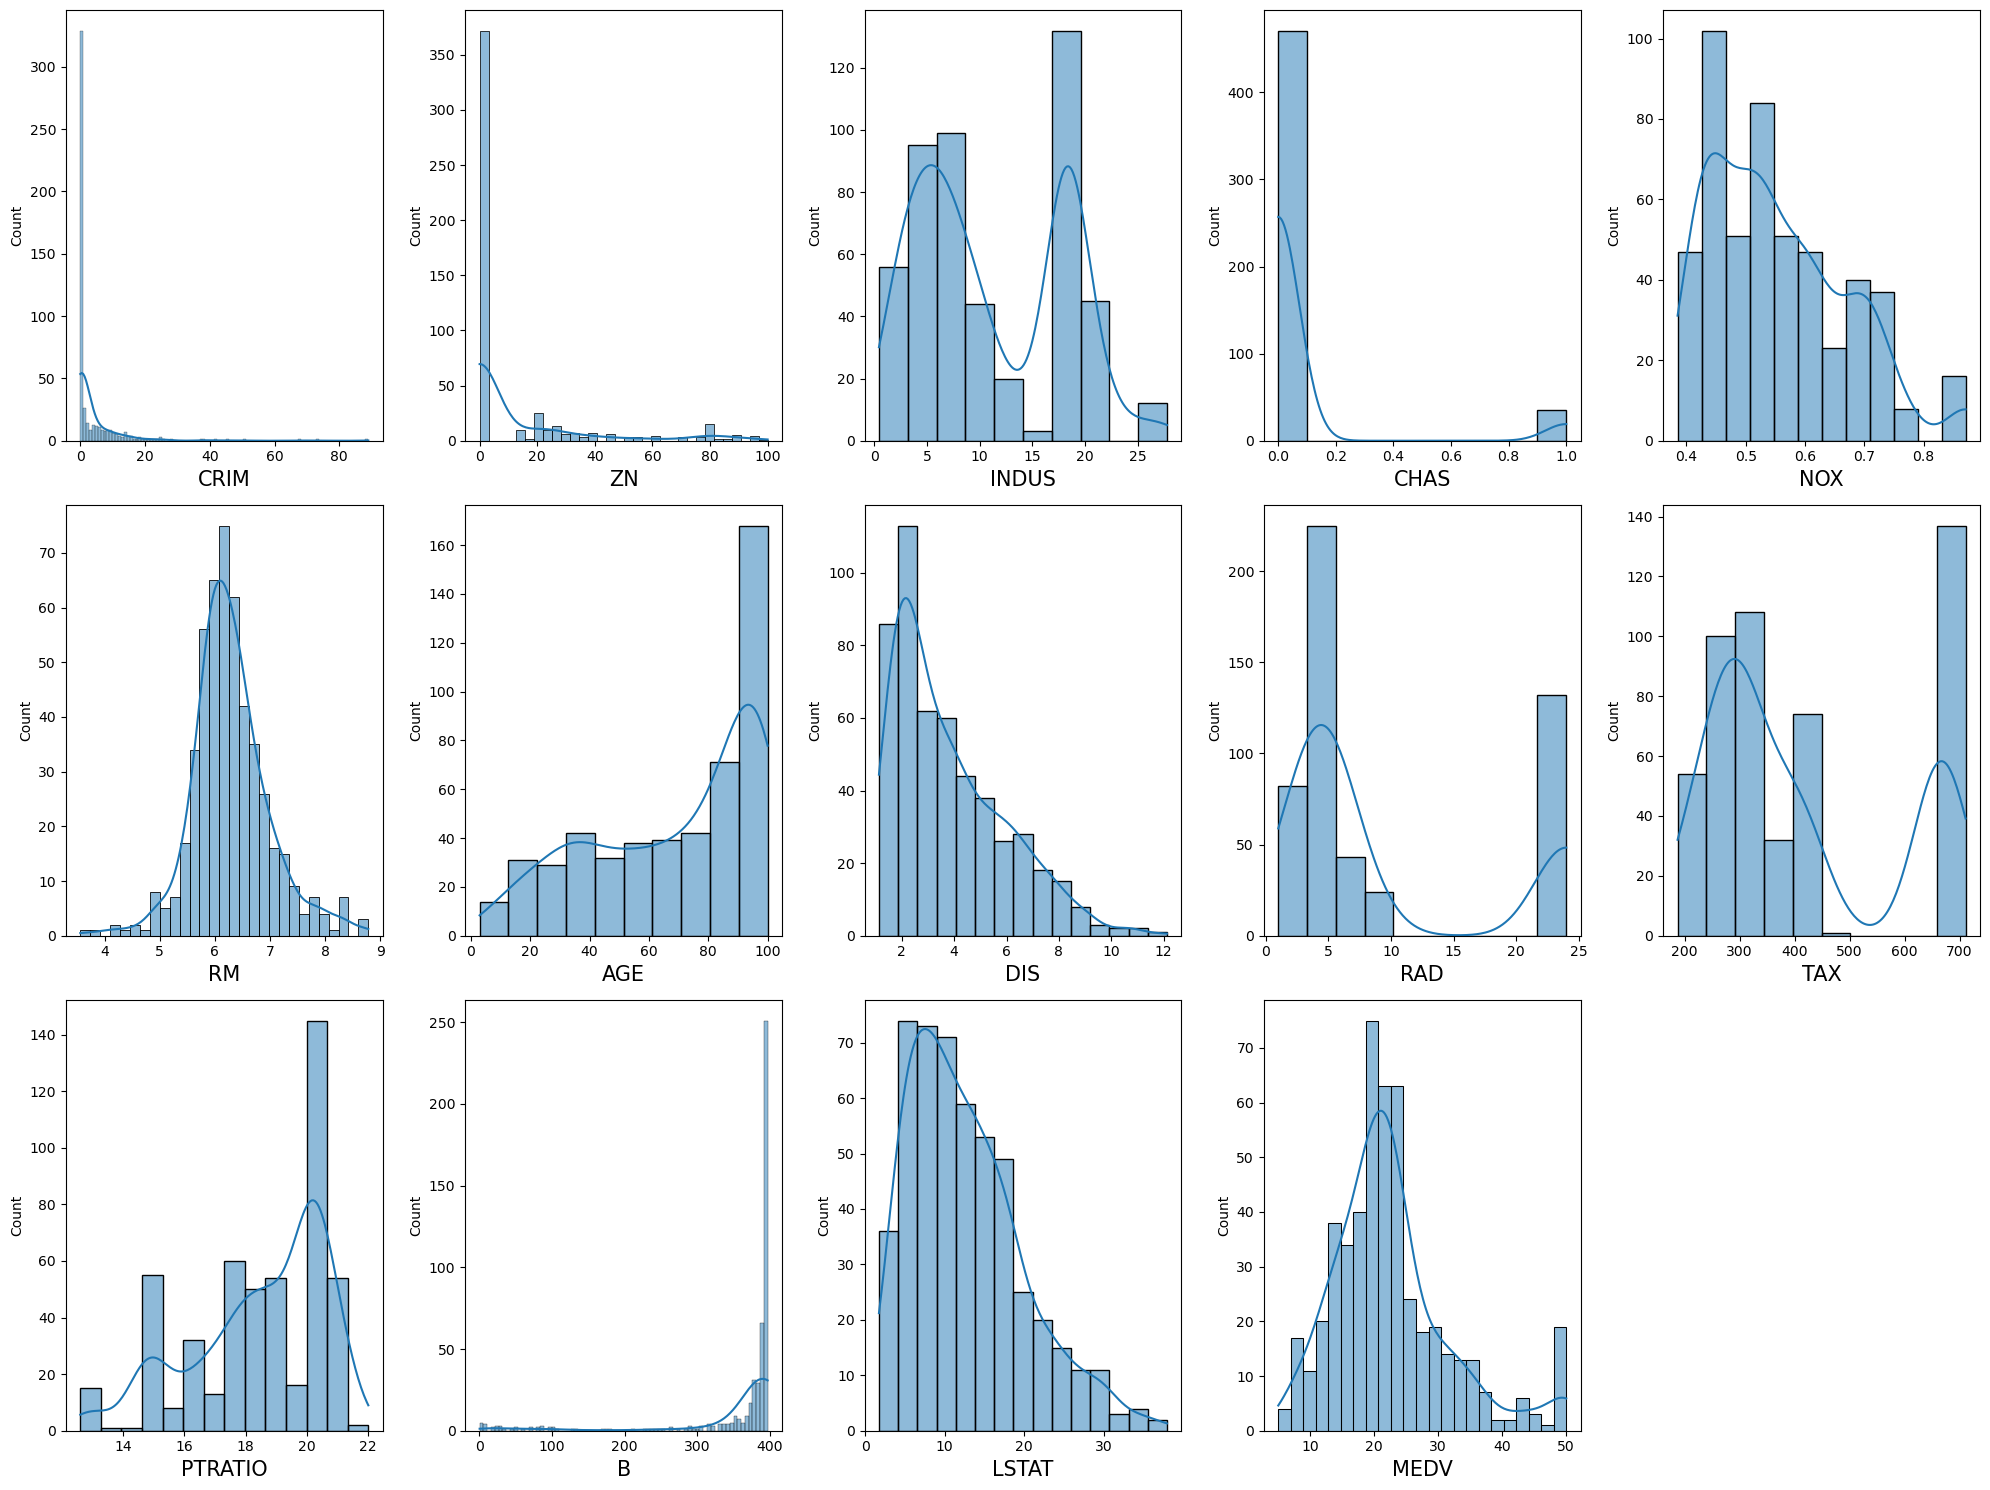

In [15]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

There are some outliers in data, so StandardScaler can help in scaling data.

In [16]:
# creating features and label variable

X = data.drop(columns = 'MEDV', axis = 1)
y = data['MEDV']

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [18]:
# checking for multicollinearity using `VIF` and `correlation matrix`

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif.sort_values(by='VIF',ascending=False)

,VIF,Features
9,9.008554,TAX
8,7.484496,RAD
4,4.393720,NOX
2,3.991596,INDUS
7,3.955945,DIS
6,3.100826,AGE
12,2.941491,LSTAT
1,2.298758,ZN
5,1.933744,RM
10,1.799084,PTRATIO


As we can see the high multicolnarity

In [19]:
# dropping 'TAX' column from data

X.drop(columns = ['TAX'], axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


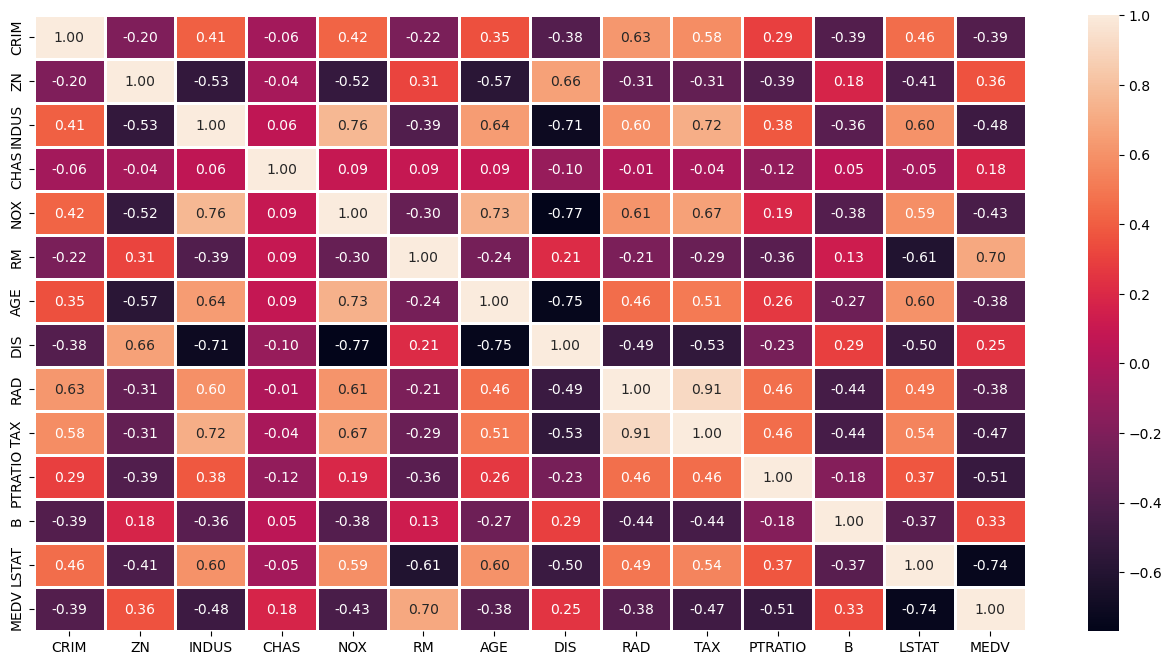

In [20]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

"RAD" and "TAX" columns are highly correlated which means multicollinearity is present so we have to remove one column.

In [21]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'MEDV ~ RAD', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           5.47e-19
Time:                        21:26:13   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3821      0.562     46.964      0.000      25.278      27.486
RAD           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [22]:
lm = smf.ols(formula = 'MEDV ~ TAX', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           5.64e-29
Time:                        21:26:14   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.000      31.108      34.834
TAX           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From OLS Regression Results we can conclude that removing "RAD" column will be good.

In [23]:
# removing "RAD" column

data.drop(columns = 'RAD', axis = 1, inplace = True)

In [24]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [25]:
# splitting data into training asnd test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0)

In [26]:
X_train.shape,y_train.shape

((354, 13), (354,))

In [27]:
# fitting training data to model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
# LinearRegression()
# prediction of model

y_pred = lr.predict(X_test)

In [28]:
# training accuracy of model

lr.score(X_train, y_train)

0.7645451026942549

In [29]:
# test accuracy of model

lr.score(X_test, y_test)

0.6733825506400196

In [37]:
# creating a function to create adhusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

Model r2 score is less on the test data so there is chance of overfitting, let's check this using regularization.

# Lasso Regresssion

In [30]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [31]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

0.0005927671694272829

In [33]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
# Lasso(alpha = lasso_cv.alpha_)

Lasso(alpha=0.0005927671694272829)

In [34]:
lasso.score(X_train, y_train)

0.7645448200811183

In [35]:
lasso.score(X_test, y_test)

0.6733278908244457

In [38]:
print(adj_r2(X_train, y_train, lasso))
# 0.7555421220253964
print(adj_r2(X_test, y_test, lasso))

0.7555421220253964
0.6425544312644297


# Ridge Regression

In [39]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([7.91107184e+00, 6.24248096e-03, 3.47464634e+00, 6.46900279e+00,
       6.83083924e+00, 6.33336600e+00, 1.50510689e+00, 6.69756072e+00,
       8.58213414e+00, 3.11896912e+00, 5.79399832e+00, 8.76797196e+00,
       2.18997927e+00, 9.65039519e+00, 8.78940945e+00, 8.65239590e+00,
       3.55900617e+00, 7.03397368e+00, 4.13263506e+00, 9.88051542e+00,
       9.77246905e+00, 1.56303907e+0...
       8.85368839e-02, 5.07435727e+00, 9.21268962e+00, 9.51666296e+00,
       8.57815625e+00, 3.71939108e+00, 8.09874513e+00, 7.54923866e+00,
       1.80060309e+00, 4.55023574e+00, 6.05359985e+00, 3.00857837e+00,
       2.88335726e-01, 1.90125357e+00, 5.82070317e+00, 7.50356738e+00,
       1.58308509e+00, 9.60974389e+00, 2.61827387e+00, 7.40815606e+00,
       7.90507916e+00, 5.20869222e+00]),
        cv=10, normalize=True)

In [40]:
# best alpha parameter

alpha = ridge_cv.alpha_
alpha

0.08853688394298787

In [41]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.08853688394298787)

In [42]:
print(ridge.score(X_train, y_train))

print(ridge.score(X_test, y_test))

0.7645449415280675
0.6733278838200949


In [43]:
print(adj_r2(X_train, y_train, ridge))
# 0.7555419322660382
print(adj_r2(X_test, y_test, ridge))

0.7555422481159053
0.6425544236002487


We still are getting the same r2 score. That means our Regression model has been well trained over the training data and there is no overfitting.